# Bayesian analysis of performance metrics 

This notebook reevaluates the performance of a binary classifier by using the Bayes rule. As an example, we'll use the performance of two lie detectors that are being proposed to perform massive screening of migrants and/or refugees.

Although the scientific consensus is that lie detectors do not exist [0], in this post we will not discuss this issue neither we won't discuss assumptions of the methods, experimental validation, etc. Rather we will try to analyze the actual feasibility of the proposed solutions to detect rare events through massive screening of populations using tools with low specificity. 

## Summary of a test

A test is a method to detect events such as cancer, spam, deception, etc. There can be two outcomes of the test for the binary case: *positive* (the test says there is a disease, deception, etc.) and *negative* (the test says there is no disease, lie, etc.). There are four results of a test: 
- **True positive**: the test says the person lies, and the person lied. 
- **False positive**: the test says person lies, and actually the person didn't lie.
- **True negative**: the test says the person doesn't lie, and they didn't. 
- **False negative**: the test says the person doesn't lie, and they lied.

These outcomes can be represented in the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), for instance, the reported performance of iBorderCtrl is (see Table IV in [5]): 

| Test Result\Ground Truth | Lie    | no-lie |
| ------------------------ | ------ | ------ |
| Test positive            | 75.55% | 26.34% |
| Test negative            | 24.45% | 73.66% |

How we interpret this performance: 

- If the person lies, there is a 75.55% of chances of having a positive test (true positive) and 24.45% of having a negative test (false negative). 
- If the person tells the truth, there is a 26.34% of chance the test will be positive (false positive) and 73.66% the test will be negative (true negative). 

Some notes on tests and probability (adapted from [1]):
- **Tests are not the event**. A test for detecting lying is a separate event from actually lying. 
- **Tests are flawed**. Tests detect things that don’t exist (false positive) and miss things that do exist (false negative). People often use test results without adjusting for test errors.
- **Bayes’ theorem** estimates the real probability of an event from the test results.


## Bayes' Theorem


![Bayes Theorem summary](pics/Bayes_Theorem.png)

Bayes' Theorem summary. Source <a href="https://betterexplained.com/articles/an-intuitive-and-short-explanation-of-bayes-theorem/">Betterexplained</a>

The probability of an event is the number of ways it could happen given all possible outcomes. In our case:

\begin{align}
\text{Probability} &= \frac{\text{desired event}}{\text{all posibilities}} \\
P(\text{Lie}\mid\text{+}) &= \frac{P(\text{+}\mid\text{Lie}) P(\text{Lie})}{P(+)} \\
 &= \frac{P(\text{+}\mid\text{Lie}) P(\text{Lie})}{P(\text{+}\mid\text{Lie}) P(\text{Lie}) + P(\text{+}\mid\text{No-lie}) P(\text{No-lie})} 
\end{align}

where:
- $P(\text{Lie}\mid\text{+})$ is the probability of having a liar ($\text{Lie}$) given a positive test ($\text{+}$), formally the *posterior probability*. 
- $P(\text{+}\mid\text{Lie})$ is the chance of having a positive test ($\text{+}$) when the person is lying $(\text{Lie}$). This is the chance of true positive (75.55% in our example).
- $P(Lie)$ is the chance of having of persons that would lie in an interview, formally *prior probability*. It can be also referred to as *frequency* or *prevalence*.
- $P(No-lie)$ is the chance of having a person that is telling the truth ($P(No-lie)=1-P(Lie)$). 
- $P(\text{+}\mid\text{No-lie})$ is the chance of having a positive test ($\text{+}$) when the person is not lying $(\text{No-lie}$). This is a false positive (26.34% in our example).

The posterior probability is also referred to as **positive predictive value** (PPV) and it answers the question: **provided we have a positive test, what is the probability the person is lying?**

Analogously, we can use the rule to calculate the **negative predictive value** (NPV): 

\begin{align}
P(\text{No-lie}\mid\text{-}) &= \frac{P(\text{-}\mid\text{No-lie}) P(\text{No-lie})}{P(\text{-})} \\
 &= \frac{P(\text{-}\mid\text{No-lie}) P(\text{No-lie})}{P(\text{-}\mid\text{No-lie}) P(\text{No-lie}) + P(\text{-}\mid\text{Lie}) P(\text{Lie})} 
\end{align}

where $P(\text{No-lie}) = 1 - P(\text{Lie})$. It answers the question **provided we have a negative test, what is the probability the person is telling the truth?**

## Formulating hypothesis of scenarios

### Correcting the confusion matrix

We can use the prevalence or prior probability to update the confusion matrix to estimate the chances of all the four possible results of the test. Assuming $P(Lie)=0.15$:

| Test Result\Ground Truth | Lie    | No-lie |
| ------------------------ | ------ | ------ |
| Test positive            | True Pos | False Pos |
| Test negative            | False Neg | True Neg |


| Test Result\Ground Truth | Lie (15%) | No-lie (85%)|
| ------------------------ | ------ | ------ |
| Test positive            | 0.15x0.7555=<br>0.1133 | 0.85x0.2634=<br>0.2239 |
| Test negative            | 0.15x0.2445=<br>0.0367 | 0.85x0.7366=<br>0.6261 |

Assuming $P(Lie)=0.01$:

| Test Result\Ground Truth | Lie (1%) | No-lie (99%)|
| ------------------------ | ------ | ------ |
| Test positive            | 0.01x0.7555=<br>0.0076 | 0.99x0.2634=<br>0.2608 |
| Test negative            | 0.01x0.2445=<br>0.0024 | 0.99x0.7366=<br>0.7292 |

In absolute numbers, in a population of 1000 persons, with 10 of liars (1%), the test will discover 7 liars, but will wrongly label as liars 260 innocent people. In other words, to discover one actual liar the test will wrongly classify 65 people that are telling the truth.

### Posterior probability
$Lie$ is called *hypothesis* whose probability may be affected by data (evidence or test). By varying $P(Lie)$ we can observe the variation of the posterior probability under different hypotheses. For example, we can calculate the *posterior probability* (**positive predictive value**, PPV) with the hypothesis of 15% of liars ($P(Lie)=0.15$) in the population that will be screened:

\begin{align}
P(\text{Liar}\mid\text{+}) &= \frac{0.7555 \times 0.15}{0.7555 \times 0.15 + 0.2634 \times 0.85} \\
&\approx 33.61\%
\end{align}

And the expected rate of false positives (**false discovery rate**, FDR): 

\begin{align}
P(\text{No-liar}\mid\text{+}) &= 1-P(\text{Liar}\mid\text{+})=1-0.3529  \\
&\approx 66.39\%
\end{align}

This means that, in a scenario of 15% of liars, 33.61% of positive tests will correspond to actual liars crossing the borders and 66.39% will correspond to false positives. This performance decay that might seem counterintuitive can be explained by the [base rate fallacy](https://en.wikipedia.org/wiki/Base_rate_fallacy).

Analogously, we can calculate the **negative predictive value** (NPV) with the Bayes' Theorem:

\begin{align}
P(\text{No-liar}\mid\text{-}) &= \frac{0.7366 \times 0.85}{0.7366 \times 0.85 + 0.2634 \times 0.15} \\
&\approx 94.46\%\\
\end{align}

And the expected rate of false negatives (**false omission rate**, FOR)): 
\begin{align}
P(\text{Liar}\mid\text{-}) &= 1-P(\text{No-liar}\mid\text{-})=1-0.9446  \\
&\approx 5.53\%
\end{align}

## Python example code

We can better observe how the test behaves for different base rates by testing different values of $P(Lie)$.

The following code calculates the posterior probability for finding an actual liar given a positive test:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('text', usetex=True)

# E is the test outcome
# H is the hypothesis
posterior = lambda PrEH, PrH, PrEnH: (PrEH * PrH) / (PrEH * PrH + PrEnH * (1 - PrH))

### iBorderCtlr

The [iBorderCtlr](http://iborderctrl.eu/) is an EU funded project to develop a intelligent portable control system for borders. The project features many of the components of smart borders systems (biometrics, document authentication, etc.) but it also performs *risk-scoring* of travelers and *automated deception detection* to evaluate travelers and migrants at the border. 

We can get $P(\text{+}\mid\text{Lie})$ and $P(\text{-}\mid\text{No-Lie})$ iBorderCtlr last publication [5]:

In [2]:
# Pr(E|H) Chance of a positive test (E) given there is a liar (H). 
# This is the chance of a true positive. Also sensitivity
PrEH = 0.7555
# Chance of a positive test (E) given that the person wasn't a lying. 
# This is the probability of a false positive, also (1-specificity)
PrEnH = 0.2634

# Test the example
PrH = 0.15
PrHE = posterior(PrEH, PrH, PrEnH)
PrnHnE = posterior( (1-PrEnH), (1-PrH), (1-PrEH) )

print('PrHE={} - PrnHnE={}'.format(PrHE, PrnHnE))

PrHE=0.33606156309772695 - PrnHnE=0.9446653137895396


We can build the posterior probabilities of true positives and true negatives and annotate a specific hypothesis of 10% of people lying to pass the border:

0.10001

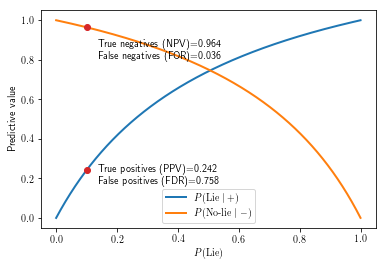

In [3]:
# Let's test different hypotheses
vPrH = np.arange(0.00001, 1.0, 0.0001)
vfunc = np.vectorize(posterior)

# posterior of true positives / positive predictive value
vPrHE = vfunc(PrEH, vPrH, PrEnH)
# posterior of false positives
vPrnHE = 1 - vPrHE 

# posterior of true negatives / false predictive value
# 1-PrEnH = specificity 
# 1-PrH = prevalence of negative class
# 1-PrEH = 1-sensitivity
vPrnHnE = vfunc( (1-PrEnH), (1-vPrH), (1-PrEH) )
# posterior of false negatives
vPrHnE = 1 - vPrnHnE 

# Plot the two posteriors
fig, ax = plt.subplots()
ax.plot(vPrH, vPrHE, '-', lw=2, color='tab:blue')
ax.plot(vPrH, vPrnHnE, '-', lw=2, color='tab:orange')
plt.xlabel(r'$\displaystyle P(\textrm{Lie})$')       
plt.ylabel(r"Predictive value") 
plt.legend([r"$\displaystyle P(\textrm{Lie}\mid +)$", r"$\displaystyle P(\textrm{No-lie}\mid -)$"])

#plt.title("Bayesian evaluation of performance")

i = 1000

ax.plot(vPrH[i], vPrHE[i], 'o', lw=2, color='tab:red')
ax.plot(vPrH[i], vPrnHnE[i], 'o', lw=2, color='tab:red')

ax.annotate('True positives (PPV)={:.3f} \n False positives (FDR)={:.3f}'.format(vPrHE[i],vPrnHE[i]),
            xy=(vPrH[i], vPrHE[i]),
            xycoords='data',
            xytext=(vPrH[i] + 0.07, vPrHE[i] + 0.05),
            textcoords='axes fraction',
            horizontalalignment='left',
            verticalalignment='top')

ax.annotate('True negatives (NPV)={:.3f} \n False negatives (FOR)={:.3f}'.format(vPrnHnE[i], vPrHnE[i]),
            xy=(vPrH[i], vPrnHnE[i]),
            xycoords='data',
            xytext=(vPrH[i] + 0.07, vPrnHnE[i] - 0.10),
            textcoords='axes fraction',
            horizontalalignment='left',
            verticalalignment='top')
vPrH[i]

### Thermal analysis to screen refugees 

Last December the University of Granada published an interview with one of the authors of a system to spot liars based on *the Pinocchio Effect*. The methods use thermography to detect an increase of temperature in the nose of people who are lying while answering a question. The authors propose to use the tool to screen persons at refugee tamps to know "*what is the real purpose of people trying to cross borders between countries*" [7]. 

We can get the TP and FP from the journal publication [6]:

- $P(\text{+}\mid\text{Lie})=0.80$
- $P(\text{+}\mid\text{Non-lie})=0.20$

From the interview we don't have clear what the authors mean with *the real purpose of people* at refugee camps. Let's assume this purpose can be, for instance, to spot terrorists that would be hypothetically hidden in a refugee camp or are trying to enter Europe. So we want to know whether it would be useful to screen all the refugees using a lie detector to spot terrorists. 

We can calculate the prior of refugees that might be related to terrorism by using the data provided by the conservative think tank 'The Heritage Foundation' which claims, with no sources, that there where 44 refugees or asylum seekers involved in terrorist plots in Europe from 2014 to 2017. Note this is an unrealistic scenario with more people related to terrorism that actually are. In that period, we had 3,915,445 first time asylum applicants in Europe [9]. Then, we have the prior of refugees that during an interview will answer they are not terrorist, but they are: 

$P(\text{Lie})=\frac{44}{3915445}=0.000011$

So we can update the relative confusion matrix:

| Test Result\Ground Truth | Lie (0.0011%) | No-lie (99.9989%)|
| ------------------------ | ------ | ------ |
| Test positive            | 0.000011x0.80=<br>0.0000088 | 0.999989x0.20=<br>0.1999978 |
| Test negative            | 0.000011x0.20=<br>0.0000022 | 0.999989x0.80=<br>0.7999912 |

We can build the absolute confusion matrix for the population of 4 million asylum seekers: 

| Test Result\Ground Truth | Lie | No-lie |
| ------------------------ | ------ | ------ |
| Test positive            | 35 | 799991 |
| Test negative            | 8 | 3199964  |

Therefore, to discover one terrorist, 22856+1 persons would need to be investigated after been labelled as liars by the system.

We can calculate the posterior probabilities of having an actual liar when the thermal analysis test is positive (PPV) and having an person answering the truth when the test is negative (NPV): 

\begin{align}
P(\text{Liar}\mid\text{+}) &= \frac{0.80 \times 0.000011}{0.80 \times 0.000011 + 0.20 \times 0.999988} \\
&\approx 0.004495\%\\
P(\text{No-liar}\mid\text{-}) &= \frac{0.80 \times 0.999988}{0.20 \times 0.000011 + 0.80 \times 0.999988}  \\
&\approx 99.9997\%
\end{align}

On the one hand, this means that *only 4 in a population of 1000 terrorists will be detected by the lie detector*. On the other hand, the NPV is 99.9997%. The expected rate of false positives is 0.2. 

We can use the previous code to see how the model performs under different hypotheses (we highlight the case of 0.5% of terrorists, which does not correspond with real frequency)

0.00501

<Figure size 432x288 with 0 Axes>

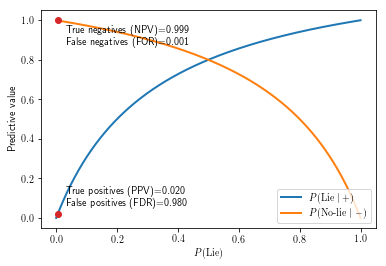

In [4]:
# Pr(E|H) Chance of a positive test (E) given there is a liar (H). This is the chance of a true positive.
PrEH = 0.80
# Chance of a positive test (E) given that the person wasn't a lying. This is the probability of a  false positive
PrEnH = 0.20

# posterior of true positives / positive predictive value
vPrHE = vfunc(PrEH, vPrH, PrEnH)
# posterior of false positives
vPrnHE = 1 - vPrHE 
# posterior of true negatives / false predictive value
vPrnHnE = vfunc( (1-PrEnH), (1-vPrH), (1-PrEH) )
# posterior of false negatives
vPrHnE = 1 - vPrnHnE 

# Plot the two posteriors
plt.clf()
fig, ax = plt.subplots()
ax.plot(vPrH, vPrHE, '-', lw=2, color='tab:blue')
ax.plot(vPrH, vPrnHnE, '-', lw=2, color='tab:orange')
plt.xlabel(r'$\displaystyle P(\textrm{Lie})$')       
plt.ylabel(r"Predictive value") 
plt.legend([r"$\displaystyle P(\textrm{Lie}\mid +)$", r"$\displaystyle P(\textrm{No-lie}\mid -)$"],loc='lower right')

i = 50

ax.plot(vPrH[i], vPrHE[i], 'o', lw=2, color='tab:red')
ax.plot(vPrH[i], vPrnHnE[i], 'o', lw=2, color='tab:red')

ax.annotate('True positives (PPV)={:.3f} \n False positives (FDR)={:.3f}'.format(vPrHE[i],vPrnHE[i]),
            xy=(vPrH[i], vPrHE[i]),
            xycoords='data',
            xytext=(vPrH[i] + 0.07, vPrHE[i] + 0.17),
            textcoords='axes fraction',
            horizontalalignment='left',
            verticalalignment='top')

ax.annotate('True negatives (NPV)={:.3f} \n False negatives (FOR)={:.3f}'.format(vPrnHnE[i], vPrHnE[i]),
            xy=(vPrH[i], vPrnHnE[i]),
            xycoords='data',
            xytext=(vPrH[i] + 0.07, vPrnHnE[i] - 0.07),
            textcoords='axes fraction',
            horizontalalignment='left',
            verticalalignment='top')

vPrH[i]


## Decision tree of events

To sum up all the concepts we present the decision tree of events of the example of iBorderCtrl to relate the corrected test outcomes and the posterior probabilities.

![Decision tree of events](pics/decision-tree.png)


## Conclusions

- Massive screening of entire populations to look for events through a flawed test is problematic 
- Performance analysis should be corrected with the prior probability of the event of interest
- None of the proposed tests will be able to detect illegalised migrants or terrorists with the so-called lie detectors, even if they really existed 
- If we assume lie detectors work, terrorists would likely adopt countermeasures, which would decrease the true discovery rate 
- There is no trade-off between human rights, freedom and privacy and security in the massive screening of a population with flawed tests. No security improvement can be achieved by these means. By forcing migrants and asylum seekers to pass through a test, intended to discover criminals in the public imaginary, these collectives are indeed being criminalised. 

## References

[0] National Research Council. 2003. The Polygraph and Lie Detection. Washington, DC: The National Academies Press. https://doi.org/10.17226/10420.

[1] BetterExplained, [An Intuitive (and Short) Explanation of Bayes’ Theorem](https://betterexplained.com/articles/an-intuitive-and-short-explanation-of-bayes-theorem/)

[2] Countbayesie.com, [Han Solo and Bayesian Priors](https://www.countbayesie.com/blog/2015/2/18/hans-solo-and-bayesian-priors)

[3] Wikipedia, [Base rate fallacy](https://en.wikipedia.org/wiki/Bayesian_inference)

[4] Wikipedia, [Bayesian inference](https://en.wikipedia.org/wiki/Base_rate_fallacy)

[4] Vera Wilde, [Refugee screening: a brief introduction (and a request for equipment)](http://www.scq.ubc.ca/refugee-screening-a-brief-introduction-and-a-request-for-equipment/)

[5] OrShea, James, Keeley Crockett, Wasiq Khan, Philippos Kindynis, Athos Antoniades, and Georgios Boultadakis. 2018. ‘Intelligent Deception Detection through Machine Based Interviewing’. In 2018 International Joint Conference on Neural Networks (IJCNN), 1–8. Rio de Janeiro, Brazil: IEEE. https://doi.org/10.1109/IJCNN.2018.8489392.

[6] Moliné, A., E. Dominguez, E. Salazar‐López, G. Gálvez‐García, J. Fernández‐Gómez, J. De la Fuente, O. Iborra, F. J. Tornay, and E. Gómez Milán. 2018. ‘The Mental Nose and the Pinocchio Effect: Thermography, Planning, Anxiety, and Lies’. Journal of Investigative Psychology and Offender Profiling 15 (2): 234–48. https://doi.org/10.1002/jip.1505.

[7] ‘Científicos de La UGR Investigan El Denominado “Efecto Pinocho” | Canal UGR’. n.d. Accessed 3 June 2019. https://perma.cc/799W-364A.

[8] Simcox, Robin. n.d. ‘The Asylum–Terror Nexus: How Europe Should Respond’, no. 3314: 12. https://www.heritage.org/sites/default/files/2018-06/BG3314.pdf

[9] https://ec.europa.eu/eurostat/en/web/products-datasets/-/MIGR_ASYAPPCTZA

[10] Positive and negative predictive values https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values
